In [1]:
import csv
import json
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

### LOAD DATA

In [37]:
def preprocess(article):
    article = article.encode('utf-8')
    article = str(article.lower())
    return removeTagsInterpuntion(article)

def removeTagsInterpuntion(article): #remove URL's, HTML-tags and interpuntion
    article = re.sub("^https?:\/\/.*[\r\n]*", '', article)
    article = re.sub('\\\\x\w\w', '', article)
    article = re.sub('[^a-z\s]', '', article)
    return article

def loadTrainData(path, texts, undetailedLabels,detailedLabels, urls, highLevelLabels = True):
    with open(path) as data_file:    
        for line in data_file:
            jsons = re.split('\]\[', line)
            data = []
            for newline in jsons:
                newline = re.sub('\]\[', '\[', newline)
                if newline[0] is not "[":
                    newline = "[" + newline
                if newline[len(newline)-1] is not "}" and newline[len(newline)-1] is not "]":
                    newline+= "}"
                if newline[len(newline)-1] is not "]":
                    newline+= "]"
                betterload = json.loads(newline)
                data.extend(betterload)
    for article in data:
        text = preprocess(article["content"])
        if len(article["category"]) != 0:
            if len(text.split()) > 9 and article["category"][0] != "NOCAT": #Remove small sentences
                if article["url"] not in urls and "kv-tk" not in article["url"]:
                    urls.append(article["url"])
                    texts.append(text)
                    if highLevelLabels:
                        label = []
                        for lowLevelLabel in article["category"]:
                            if lowLevelLabel.split("|")[0] not in label:
                                label.append(lowLevelLabel.split("|")[0])
                        undetailedLabels.append(label)
                    #else:
                    detailedLabels.append(article["category"])
    return texts, undetailedLabels,detailedLabels, urls

texts = []
undetailedLabels = []
detailedLabels = []
urls = []
paths = [r"C:\Users\PC-Axel\Documents\github\thesis\Data\PoliFLW Data\kamerstukken_goed_jan2016.json",
        r"C:\Users\PC-Axel\Documents\github\thesis\Data\PoliFLW Data\kamerstukken_goed_jan2015.json",
        r"C:\Users\PC-Axel\Documents\github\thesis\Data\PoliFLW Data\kamerstukken_goed_okt2015.json",
        r"C:\Users\PC-Axel\Documents\github\thesis\Data\PoliFLW Data\kamerstukken_goed_2017.json",
        r"C:\Users\PC-Axel\Documents\github\thesis\Data\PoliFLW Data\kamerstukken_goed_2010-2014.json",
        r"C:\Users\PC-Axel\Documents\github\thesis\Data\PoliFLW Data\kamerstukken_goed_2001-2003.json",
        r"C:\Users\PC-Axel\Documents\github\thesis\Data\PoliFLW Data\kamerstukken_goed_2004-2006.json",
        r"C:\Users\PC-Axel\Documents\github\thesis\Data\PoliFLW Data\kamerstukken_goed_2007-2009.json"]

for path in paths:
    texts, undetailedLabels,detailedLabels, urls = loadTrainData(path, texts, undetailedLabels,detailedLabels, urls)
    print("path done")

path done
path done
path done
path done
path done
path done
path done
path done


In [31]:
def loadTestData(path, texts,textLengths, types):
    with open(path, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter='|')
        for row in spamreader:
            if len(row[1].split()) > 100:
                textLengths.append(len(row[1].split()))
                texts.append(row[1])
                types.append(row[3])
    return texts, textLengths, types

texts = []
types = []
textLengths = []
paths = [r"C:\Users\PC-Axel\Documents\github\thesis\Code\Data Preparation\alleGemeentes.csv"]

for path in paths:
    texts, textLengths, types = loadTestData(path, texts,textLengths, types)

In [38]:
print(len(texts))
print(Counter(types))

1089
Counter({"b'Agendapunt'": 566, "b'Verslag'": 400, "b'Report'": 17, "b'Videotulen Gemeenteraad'": 15, "b'Videotulen Vragenuur'": 14, "b'Videotulen Raadsvergadering '": 13, "b'Besluitenlijst'": 12, "b'Agenda'": 9, "b'Videotulen Gemeenteraadsvergadering'": 9, "b'Videotulen Commissie Mens en Samenleving'": 8, "b'Videotulen Commissie Stad en Ruimte'": 6, "b'Amendementen'": 5, "b'Resolution'": 3, "b'Moties'": 3, "b'Raadsvragen'": 1, "b'Videotulen Raadsvergadering'": 1, "b'Videotulen Commissie Samenleving'": 1, "b'Videotulen Commissie Beleid Algemeen'": 1, "b'Videotulen Commissie Ruimte'": 1, "b'Videotulen Commissie Stad & Ruimte'": 1, "b'Videotulen Commissie Ruimte '": 1, "b'Videotulen Commissie Beleid Algemeen '": 1, "b'Videotulen 1 minuut stilte ter nagedachtenis aan de slachtoffers aanslagen Parijs'": 1})


In [55]:
with open('filteredGemeentes.csv', 'w', newline='') as csvfile1:
    with open(r"C:\Users\PC-Axel\Documents\github\thesis\Code\Data Preparation\alleGemeentes.csv", newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter='|')
        spamwriter = csv.writer(csvfile1, delimiter='|', quoting=csv.QUOTE_MINIMAL)
        for row in spamreader:
            if len(row[1].split()) > 100 and 'punt' in row[3]:
                write = []
                for part in row:
                    write.append(part)
                spamwriter.writerow(write)

In [33]:
import random
random.Random(4).shuffle(texts)
random.Random(4).shuffle(textLengths)
random.Random(4).shuffle(types)

In [37]:
for text, typee in zip(texts[:10], types[:10]):
    print(typee)
    print(text)
    print()

b'Videotulen Commissie Mens en Samenleving'
b'<h3>1 Opening en mededelingen</h3> <p></p> <h3>2 Vaststellen agenda en inventarisatie te bespreken agendapunten</h3> <p></p> <h3>3 Verslagen</h3> <p></p> <h3>4 Ingekomen stukken</h3> <p></p> <h3>5 Mogelijkheid tot het stellen van rondvraagpunten en vragen t.a.v. de toezeggingenlijst aan de portefeuillehouder(s)</h3> <p></p> <h3>22 Stichting Vlietkop/Nieuw Utrecht</h3> <p></p> <h3>23 Opmerkingen toezeggingenlijst en beantwoording rondvraagpunten wethouder Jansen</h3> <p></p> <h3>24 SV 2014, nr. 93 inzake "Toegankelijke organisatie; bereikbare ambtenaren!\'.</h3> <p></p> <h3>25 Opmerkingen toezeggingenlijst en beantwoording rondvraagpunten wethouder Geldof</h3> <p></p> <h3>26 Rekenkameronderzoek: \'Jeugdhulp in ontwikkeling. Een onderzoek naar de decentralisatie van de jeugdzorg in Utrecht\'.</h3> <p></p> <h3>27 SV 2014, nr. 85 inzake Privacy van Ouders en Minderjarige Kinderen bij Preventief Gezondheidsonderzoek</h3> <p></p> <h3>28 STREKT TE

### SHOW TRAINING DATA

#### CATEGORY

In [57]:
countUndetailedLabels = [0] * 9
allUndetailedLabels = []

for label in undetailedLabels:
    countUndetailedLabels[len(label)-1]+=1
    allUndetailedLabels.extend(label)

In [58]:
countDetailedLabels = [0] * 9
allDetailedLabels = []

for label in detailedLabels:
    countDetailedLabels[len(label)-1]+=1
    allDetailedLabels.extend(label)
print(countDetailedLabels)

[23272, 19402, 7076, 2006, 460, 133, 35, 9, 4]


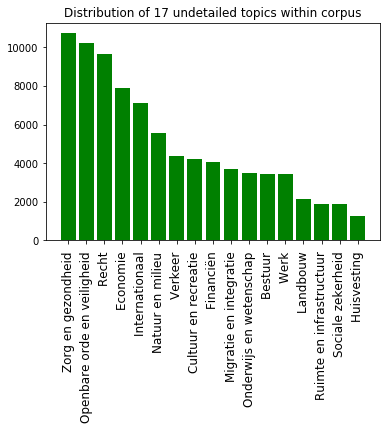

In [82]:
myDictionary = dict(Counter(allUndetailedLabels))
list1, list2 = (list(t) for t in zip(*sorted(zip(myDictionary.values(), myDictionary.keys()), reverse=True)))
x = np.arange(len(list2))

plt.bar(x, list1, 0.82, color='g')
plt.title("Distribution of 17 undetailed topics within corpus")
plt.xticks(x,list2, rotation='vertical', fontsize=12)
plt.show()

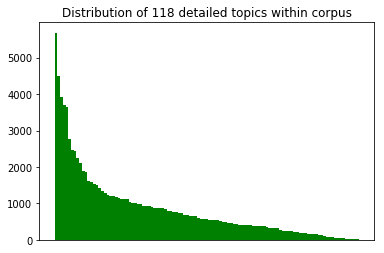

In [50]:
myDictionary = dict(Counter(allDetailedLabels))
list1, list2 = (list(t) for t in zip(*sorted(zip(myDictionary.values(), myDictionary.keys()), reverse=True)))
x = np.arange(len(list2))

plt.bar(x, list1, 1, color='g')
plt.title("Distribution of 118 detailed topics within corpus")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.show()

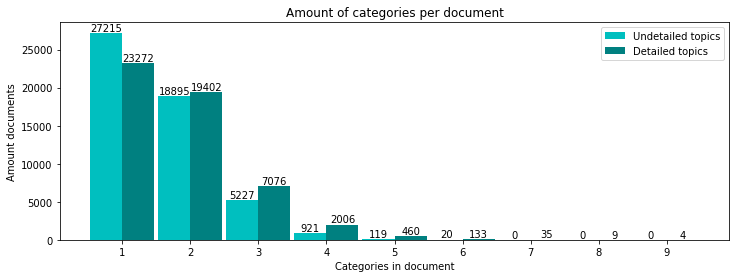

In [68]:
import numpy as np
import matplotlib.pyplot as plt

N = len(countUndetailedLabels)


ind = np.arange(N)  # the x locations for the groups
width = 0.47# the width of the bars

fig, ax = plt.subplots(figsize=(12,4))
rects1 = ax.bar(ind - 0.5*width, countUndetailedLabels, width, color='c')
rects2 = ax.bar(ind + 0.5*width, countDetailedLabels, width, color='teal')

# add some text for labels, title and axes ticks
ax.set_ylabel('Amount documents')
ax.set_xlabel('Categories in document')
ax.set_title('Amount of categories per document')
ax.set_xticks(ind)
ax.set_xticklabels(ind+1)

ax.legend((rects1[0], rects2[0]), ('Undetailed topics', 'Detailed topics'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height+1,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()

#### CONTENT

In [69]:
amountCharacters = []
amountWords = []
amountUniqueWords = []

allWordsInDict = {}

splittedContent = []

for doc in texts:
    amountCharacters.append(len(doc))
    amountWords.append(len(doc.split()))
    amountUniqueWords.append(len(set(doc.split())))
    for word in set(doc.split()):
        if word not in allWordsInDict.keys():
            allWordsInDict[word] = 1
        else:
            allWordsInDict[word] += 1

In [70]:
print(sorted(allWordsInDict, key=allWordsInDict.get, reverse=True)[:50])

['de', 'van', 'het', 'over', 'en', 'aan', 'dat', 'in', 'is', 'u', 'te', 'op', 'met', 'een', 'niet', 'voor', 'ontvangen', 'ingezonden', 'door', 'om', 'zijn', 'deze', 'worden', 'die', 'dit', 'bij', 'zo', 'minister', 'ja', 'heeft', 'er', 'ik', 'ook', 'tot', 'kamer', 'wordt', 'als', 'naar', 'leden', 'lid', 'of', 'bent', 'geen', 'vraag', 'kunnen', 'gesteld', 'kan', 'welke', 'wat', 'uit']


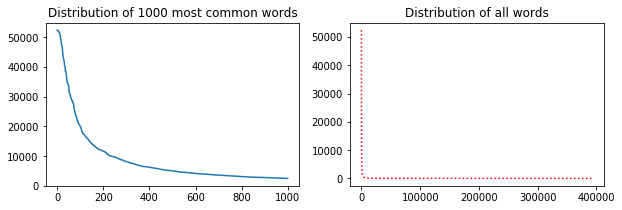

In [71]:
f = plt.figure(figsize=(10,3))

ax = f.add_subplot(121)
ax.set_title("Distribution of 1000 most common words")
y = sorted(allWordsInDict.values(),reverse = True)[:1000]
ax.plot(np.arange(len(y)), y)

ax = f.add_subplot(122)
ax.set_title("Distribution of all words")
y = sorted(allWordsInDict.values(),reverse = True)
ax.plot(np.arange(len(y)), y, 'r:')
plt.show()

The average amount of words is 688, min is 43 and max is 6608.


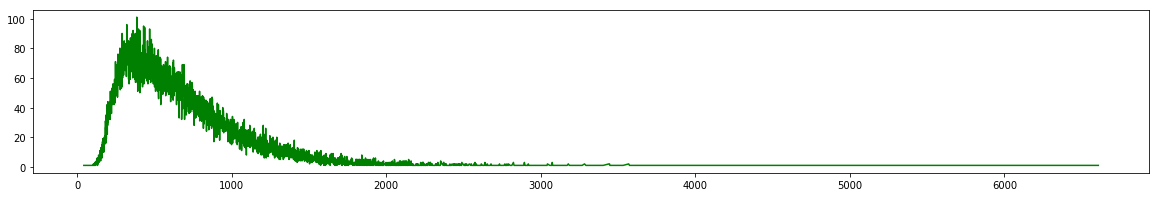

In [72]:
print("The average amount of words is %d, min is %d and max is %d." 
      % (sum(amountWords)/len(amountWords), min(amountWords), max(amountWords)))
myDictionary = dict(Counter(amountWords))
list1, list2 = (list(t) for t in zip(*sorted(zip(myDictionary.keys(), myDictionary.values()))))

plt.figure(figsize=(20,3))
plt.plot(list1, list2, color='g')
plt.show()

The average amount of characters is 4591, min is 296 and max is 44704.


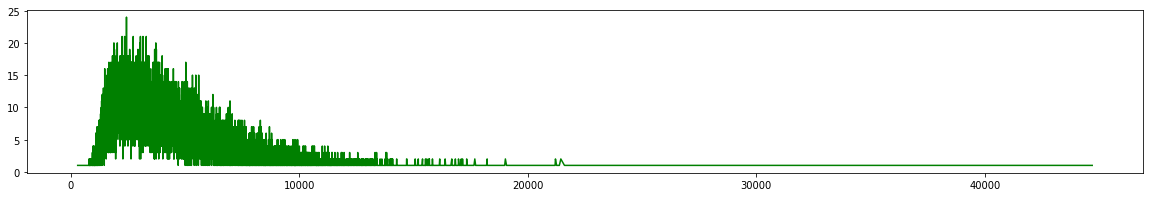

In [73]:
print("The average amount of characters is %d, min is %d and max is %d." 
      % (sum(amountCharacters)/len(amountCharacters), min(amountCharacters), max(amountCharacters)))
myDictionary = dict(Counter(amountCharacters))
list1, list2 = (list(t) for t in zip(*sorted(zip(myDictionary.keys(), myDictionary.values()))))

plt.figure(figsize=(20,3))
plt.plot(list1, list2, color='g')
plt.show()

The average amount of unique words is 290, min is 34 and max is 1667.


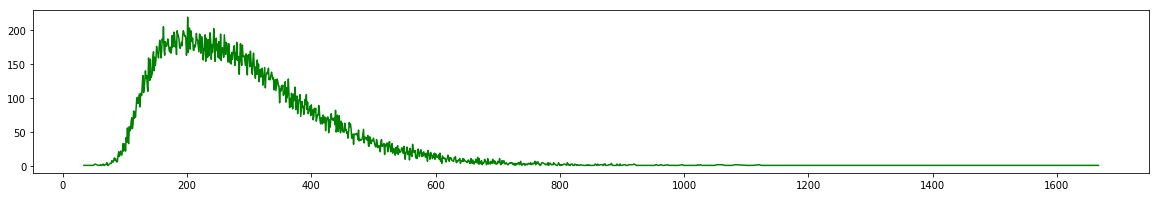

In [74]:
print("The average amount of unique words is %d, min is %d and max is %d." 
      % (sum(amountUniqueWords)/len(amountUniqueWords), min(amountUniqueWords), max(amountUniqueWords)))
myDictionary = dict(Counter(amountUniqueWords))
list1, list2 = (list(t) for t in zip(*sorted(zip(myDictionary.keys(), myDictionary.values()))))

plt.figure(figsize=(20,3))
plt.plot(list1, list2, color='g')
plt.show()

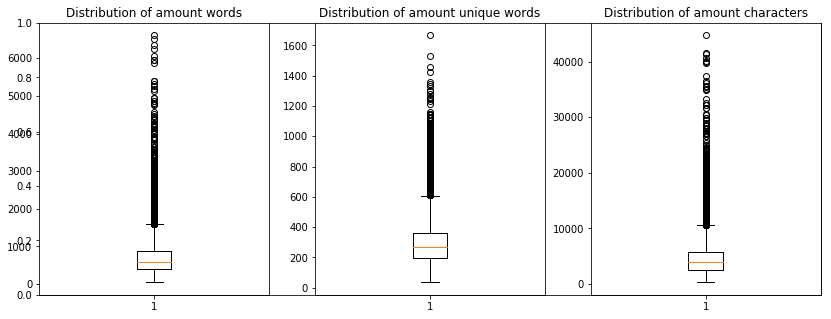

In [83]:
f = plt.figure(figsize=(14,5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

ax = f.add_subplot(131)
ax.set_title("Distribution of amount words")
plt.boxplot(amountWords)

ax = f.add_subplot(132)
ax.set_title("Distribution of amount unique words")
plt.boxplot(amountUniqueWords)

ax = f.add_subplot(133)
ax.set_title("Distribution of amount characters")
plt.boxplot(amountCharacters)

plt.show()

### TEST DATA